# **Understanding EV Charging Infrastructure to Support Sustainable Mobility.**

**Project Aim**

The aim of this project is to analyze EV charging station data to understand how charging locations, connector types, and station capacity vary across regions.

**Data Loading and Initial Overview**

In this step, we load the dataset using Pandas and explore its structure.  
we check for the :
- Number of rows and columns  
- Column names  
- Data types  
- First few records  
- Summary statistics  

This helps us to understand the shape and quality of the raw data.


In [ ]:
import pandas as pd
import numpy as np

# Upload the file into Colab
from google.colab import files
uploaded = files.upload()

# Automatically detects the filename
fname = list(uploaded.keys())[0]
df = pd.read_csv(fname)

print("Loaded:", fname)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

print("\nColumn names:")
print(df.columns.tolist())

print("\nHead:")
display(df.head())

print("\nInfo:")
df.info()

print("\nDescribe (numeric columns):")
display(df.describe())

print("\nDescribe (categorical/object columns):")
display(df.describe(include='object'))


Saving ev_stations_2025.csv to ev_stations_2025 (2).csv
Loaded: ev_stations_2025 (2).csv
Rows: 10000
Columns: 14

Column names:
['id', 'title', 'address', 'town', 'state', 'postcode', 'country', 'lat', 'lon', 'operator', 'status', 'num_connectors', 'connector_types', 'date_added']

Head:


,id,title,address,town,state,postcode,country,lat,lon,operator,status,num_connectors,connector_types,date_added
0,462769,Electra - Wambrechies - Volfoni,81 Av. Clément Ader,Wambrechies,NaN,59118,FR,50.685653,3.062410,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:58:00+00:00
1,462768,Electra - Tourcoing - Action,185 rue du Touquet,Tourcoing,NaN,59200,FR,50.723171,3.180636,Electra,Operational,3,CCS (Type 2)|CHAdeMO|Type 2 (Socket Only),2025-11-02 09:55:00+00:00
2,462767,Electra - Bondues - Sure Hotel by Best Western...,3 Av. Henri Becquerel,Bondues,NaN,59910,FR,50.722535,3.129496,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:50:00+00:00
3,462766,Electra - Bousbecque - Intermarché,Rue Auger,Bousbecque,NaN,59166,FR,50.770139,3.083454,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:46:00+00:00
4,462765,Electra - Halluin - Intermarché,Boulevard de Roncq,Halluin,NaN,59250,FR,50.769938,3.124030,Electra,Operational,2,CCS (Type 2)|Type 2 (Socket Only),2025-11-02 09:42:00+00:00



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   title            10000 non-null  object 
 2   address          9999 non-null   object 
 3   town             9797 non-null   object 
 4   state            7131 non-null   object 
 5   postcode         8330 non-null   object 
 6   country          10000 non-null  object 
 7   lat              10000 non-null  float64
 8   lon              10000 non-null  float64
 9   operator         9402 non-null   object 
 10  status           10000 non-null  object 
 11  num_connectors   10000 non-null  int64  
 12  connector_types  9995 non-null   object 
 13  date_added       10000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB

Describe (numeric columns):


,id,lat,lon,num_connectors
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,416572.240600,42.425898,-52.399215,1.456500
std,40129.224879,14.651593,63.942829,0.989851
min,374562.000000,-43.904364,-159.356940,0.000000
25%,378741.750000,42.017013,-112.697935,1.000000
50%,384381.500000,45.778014,-73.441045,1.000000
75%,459627.250000,48.673134,-0.361442,2.000000
max,462769.000000,68.377358,174.756158,26.000000



Describe (categorical/object columns):


,title,address,town,state,postcode,country,operator,status,connector_types,date_added
count,10000,9999,9797,7131,8330,10000,9402,10000,9995,10000
unique,9577,9411,3852,403,6015,72,263,6,197,2457
top,SWTCH Energy Inc.,Valencia,Montréal,QC,98004,CA,Circuit Electrique,Operational,Type 1 (J1772),2025-06-20 10:46:00+00:00
freq,52,10,686,2497,44,4135,1979,9301,4418,595


**Missing values and duplicates**

In [ ]:
# Check  for missing values
print("Missing values per column:")
print(df.isna().sum())

# Check for duplicate rows
dup_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", dup_count)


Missing values per column:
id                    0
title                 0
address               1
town                203
state              2869
postcode           1670
country               0
lat                   0
lon                   0
operator            598
status                0
num_connectors        0
connector_types       5
date_added            0
dtype: int64

Number of duplicate rows: 0


**Handling Missing Values**
- Rows without essential location information (latitude or longitude) are removed.  
- Missing values in text fields such as town, state, and operator is replaced with `"Unknown"`.  
- Missing connector type information is also replaced with `"Unknown"`.  
- There were no missing values in `num_connectors`, so no imputation is required.


In [ ]:
# Remove rows missing essential location values
essential_cols = [c for c in ["lat", "lon"] if c in df.columns]
if essential_cols:
    before = df.shape[0]
    df = df.dropna(subset=essential_cols)
    print(f"Dropped {before - df.shape[0]} rows without essential location data.")

# Fill missing text columns with "Unknown"
fill_with_unknown = ["town", "state", "operator", "connector_types", "address", "postcode"]
for col in fill_with_unknown:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Numeric imputation only if needed
if "num_connectors" in df.columns and df["num_connectors"].isna().sum() > 0:
    median_value = df["num_connectors"].median()
    df["num_connectors"] = df["num_connectors"].fillna(median_value)

print("\nMissing values after cleaning:")
print(df.isna().sum())


Dropped 0 rows without essential location data.

Missing values after cleaning:
id                 0
title              0
address            0
town               0
state              0
postcode           0
country            0
lat                0
lon                0
operator           0
status             0
num_connectors     0
connector_types    0
date_added         0
dtype: int64


**Additional Data Sanitization**

After handling missing values, we performed an additional sanitization step to clean up text fields and improve the readability and usability of the dataset.  
This included:
- Standardizing column names  
- Removing corrupted or non-Latin text  
- Cleaning special characters and noise  
- Removing rows with too many "Unknown" values  
 Also renamed key columns to improve readability:
- `lat` → `Latitude`
- `lon` → `Longitude`
- `date_added` → `Date Added`
Converted the `Date Added` field into a clean `dd-mm-yyyy` format and removed the time portion, making the date information easier to read and work with in further analysis.



In [ ]:
import re

# 1) Standardise column names
df.columns = (
    df.columns
    .str.replace('_', ' ')
    .str.title()
)

# 2) Remove rows with clearly corrupted non-Latin text in key fields
def has_non_latin(text):
    if pd.isna(text):
        return False
    return not bool(re.match(r'^[\x00-\x7FÀ-ÿ\s0-9\.,\-_/()]*$', str(text)))

cols_to_check = ["Title", "Address", "Town", "State", "Operator"]
for col in cols_to_check:
    if col in df.columns:
        df = df[~df[col].apply(has_non_latin)]

# 3) Remove rows with too many "Unknown" values in key descriptive columns
text_cols = ["Title", "Address", "Town", "State", "Operator"]
def count_unknown(row):
    return sum(str(row[c]).strip().lower() == "unknown" for c in text_cols if c in row.index)

df = df[df.apply(count_unknown, axis=1) <= 3]

# 4a) Clean remaining text fields (Except connector types – keep the "|" separator!)
clean_cols = ["Title", "Address", "Town", "State", "Operator"]
for col in clean_cols:
    if col in df.columns:
        df[col] = (
            df[col].astype(str)
            .str.encode('ascii', 'ignore').str.decode('ascii')
            .str.replace(r'[^A-Za-z0-9 \-\/\.,]', '', regex=True)
            .str.strip()
        )

# 4b) Clean connector types, But KEEP the "|" delimiter
if "Connector Types" in df.columns:
    df["Connector Types"] = (
        df["Connector Types"].astype(str)
        .str.encode('ascii', 'ignore').str.decode('ascii')
        .str.replace(r'[^A-Za-z0-9 \-\/\.\,\|]', '', regex=True)  # keeps "|"
        .str.strip()
    )

# 5) Rename latitude/longitude columns
rename_map = {"Lat": "Latitude", "Lon": "Longitude"}
df = df.rename(columns=rename_map)

# 6) Fix Date Added format (but do NOT extract year/month here)
if "Date Added" in df.columns:
    df["Date Added"] = pd.to_datetime(df["Date Added"], errors="coerce")
    df = df.dropna(subset=["Date Added"])
    df["Date Added"] = df["Date Added"].dt.strftime("%d-%m-%Y")


**Removing Duplicates**

The dataset contained 0 duplicated rows, but we still apply the duplicate removal step to meet the data-cleaning requirements.


In [ ]:
# Remove duplicates even if count is zero
if "id" in df.columns:
    df = df.drop_duplicates(subset=["id"])
else:
    df = df.drop_duplicates()

df = df.reset_index(drop=True)
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (9009, 14)


**Correcting data types**
Only essential conversions are done here:
- `date_added` to datetime (for time-based analysis)
- `lat` and `lon` to numeric (ensures spatial analysis is correct)

we avoid any unnecessary data type conversion to keep the work relevant and clean.



In [ ]:
# Convert coordinates to numeric
for col in ["lat", "lon"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Convert date_added to datetime if present
if "date_added" in df.columns:
    df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

print("Data types after essential conversions:")
print(df.dtypes)


Data types after essential conversions:
Id                   int64
Title               object
Address             object
Town                object
State               object
Postcode            object
Country             object
Latitude           float64
Longitude          float64
Operator            object
Status              object
Num Connectors       int64
Connector Types     object
Date Added          object
dtype: object


**Creating a few meaningful derived features:**
- `year_added` - Year when the charging station was added.
- `month_added` -Month of installation  
- `num_connector_types` - Count of different connector types offered  


In [ ]:
# 1. Convert "Date Added" back to datetime for feature extraction
if "Date Added" in df.columns:
    df["Date Added"] = pd.to_datetime(df["Date Added"], format="%d-%m-%Y", errors="coerce")
    df["Year Added"] = df["Date Added"].dt.year
    df["Month Added"] = df["Date Added"].dt.month

# 2. Number of connector types (correct splitting using "|")
if "Connector Types" in df.columns:
    df["Num Connector Types"] = df["Connector Types"].astype(str).str.split("|").apply(len)

print("Derived columns created:")
print([c for c in df.columns if "Year" in c or "Month" in c or "Connector" in c])

df.head()


Derived columns created:
['Num Connectors', 'Connector Types', 'Year Added', 'Month Added', 'Num Connector Types']


,Id,Title,Address,Town,State,Postcode,Country,Latitude,Longitude,Operator,Status,Num Connectors,Connector Types,Date Added,Year Added,Month Added,Num Connector Types
0,462769,Electra - Wambrechies - Volfoni,81 Av. Clment Ader,Wambrechies,Unknown,59118,FR,50.685653,3.062410,Electra,Operational,2,CCS Type 2|Type 2 Socket Only,2025-11-02,2025,11,2
1,462768,Electra - Tourcoing - Action,185 rue du Touquet,Tourcoing,Unknown,59200,FR,50.723171,3.180636,Electra,Operational,3,CCS Type 2|CHAdeMO|Type 2 Socket Only,2025-11-02,2025,11,3
2,462767,Electra - Bondues - Sure Hotel by Best Western...,3 Av. Henri Becquerel,Bondues,Unknown,59910,FR,50.722535,3.129496,Electra,Operational,2,CCS Type 2|Type 2 Socket Only,2025-11-02,2025,11,2
3,462766,Electra - Bousbecque - Intermarch,Rue Auger,Bousbecque,Unknown,59166,FR,50.770139,3.083454,Electra,Operational,2,CCS Type 2|Type 2 Socket Only,2025-11-02,2025,11,2
4,462765,Electra - Halluin - Intermarch,Boulevard de Roncq,Halluin,Unknown,59250,FR,50.769938,3.124030,Electra,Operational,2,CCS Type 2|Type 2 Socket Only,2025-11-02,2025,11,2


**Filtering and Aggregating Data**
- Filtered the dataset to keep only operational stations
- Aggregated station counts by country as a basic summary


In [ ]:
# Filter operational stations if status column exists
if "status" in df.columns:
    df_active = df[df["status"].astype(str).str.contains("operational", case=False)]
else:
    df_active = df.copy()

print("Active stations:", df_active.shape)

# Aggregation: number of stations by country
if "country" in df.columns:
    country_counts = df_active.groupby("country")["id"].count().reset_index()
    country_counts.rename(columns={"id":"num_stations"}, inplace=True)
    display(country_counts.head())


Active stations: (9009, 17)


Now we will be moving on to the next stage of the project Exploratory Data Analysis (EDA) ,i.e. visualizing the data for better understanding of the cleaned and organized data.

*Adding the required libraries for visualization*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# **Exploratory Data Analysis (EDA)**

### Univariate Analysis



1.   Distribution of Number of Connectors per Station


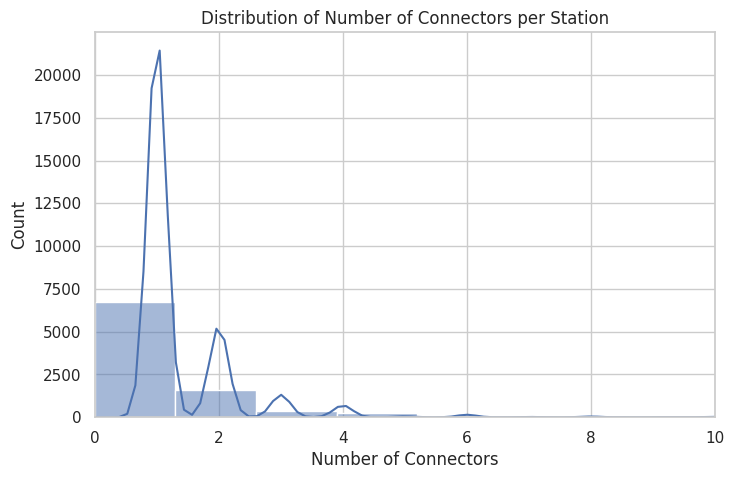

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_active["Num Connectors"], bins=20, kde=True)
plt.xlim(0, 10)
plt.title("Distribution of Number of Connectors per Station")
plt.xlabel("Number of Connectors")
plt.ylabel("Count")
plt.show()


Most EV stations have a small number of connectors (1–4).
A long tail exists, showing a few stations with larger capacity indicating uneven infrastructure expansion and potential clustering of high capacity stations in key regions.

2.   Distribution of Number of Connector Types



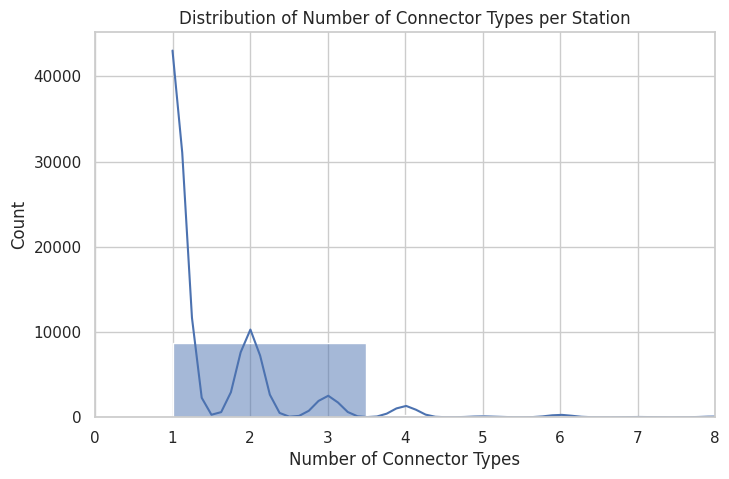

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_active["Num Connector Types"], bins=10, kde=True)
plt.xlim(0, 8)
plt.title("Distribution of Number of Connector Types per Station")
plt.xlabel("Number of Connector Types")
plt.ylabel("Count")
plt.show()


The majority of stations support 1–2 connector types, while only a few offer 3 or more. This suggests that most charging stations are designed for limited compatibility, which will impact user flexibility across different EV models.



3.   Stations Added In An Year



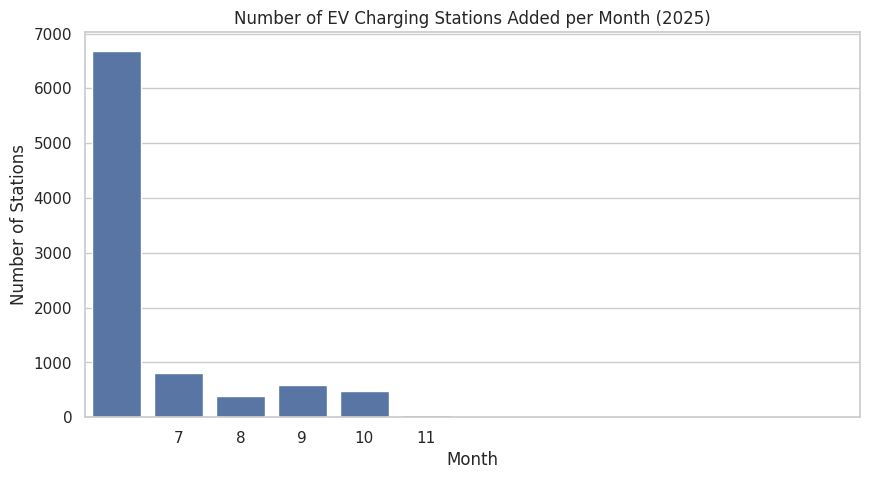

In [ ]:
df_active["Month"] = df_active["Date Added"].dt.month

monthly_counts = df_active.groupby("Month")["Id"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Number of EV Charging Stations Added per Month (2025)")
plt.xlabel("Month")
plt.ylabel("Number of Stations")
plt.xticks(range(1,13))
plt.show()



The month-wise installation pattern is highly uneven because the dataset primarily contains stations added during mid-2025. A significant concentration appears in June, which likely reflects the period when data collection or system updates were performed. Other months show smaller but valid activity, while months outside 6–11 contain few or no entries due to missing, invalid, or filtered-out data.

4. Top 10 Countries by Station Count

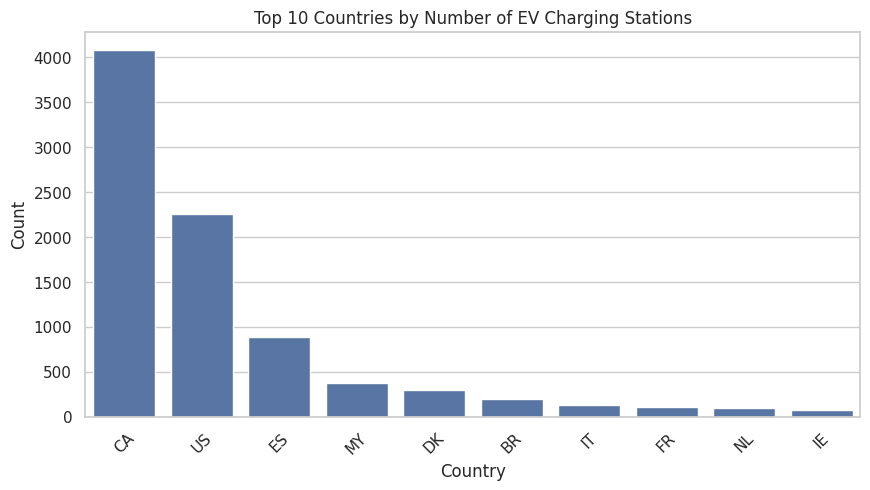

In [ ]:
top_countries = df_active["Country"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Number of EV Charging Stations")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


EV infrastructure is heavily concentrated in a small set of leading countries.
These regions likely have stronger EV policies, higher EV adoption, or greater government and private investment in public charging.

5. Most Common Connector Types

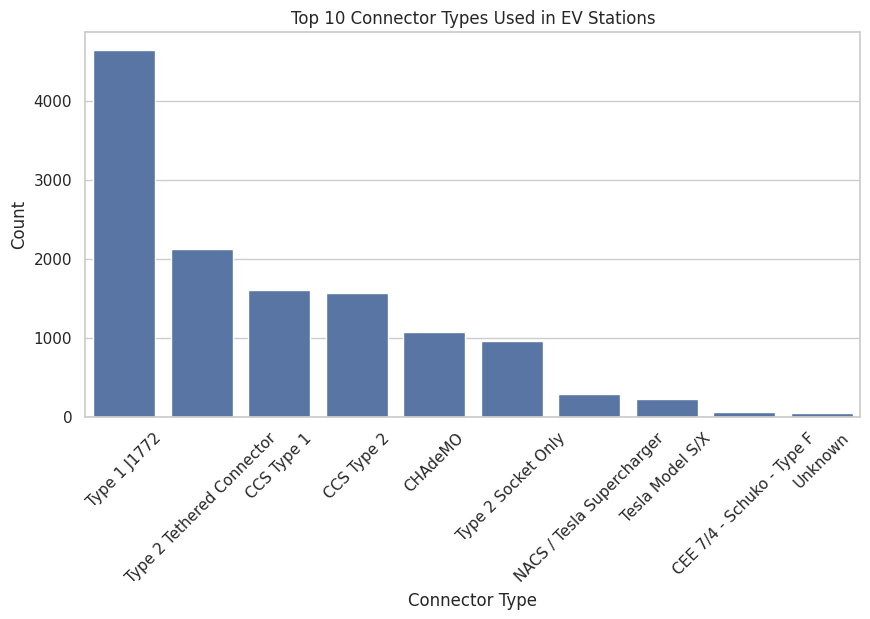

In [ ]:
conn_expanded = (
    df_active["Connector Types"]
    .dropna()
    .str.split("|")
    .explode()
    .str.strip()
)

top_connectors = conn_expanded.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_connectors.index, y=top_connectors.values)
plt.title("Top 10 Connector Types Used in EV Stations")
plt.xlabel("Connector Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


A few connector standards dominate the global charging landscape.
This indicates that manufacturers and operators follow widely adopted protocols, which improves interoperability and simplifies EV usage across stations.

## Bivariate Analysis

6. Number of Connectors by Country (Top 5)

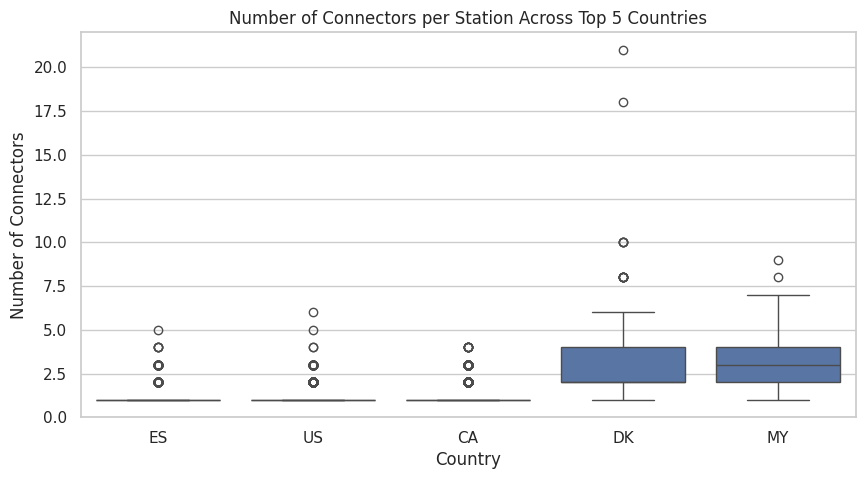

In [ ]:
top5 = df_active["Country"].value_counts().head(5).index
subset = df_active[df_active["Country"].isin(top5)]

plt.figure(figsize=(10,5))
sns.boxplot(data=subset, x="Country", y="Num Connectors")
plt.title("Number of Connectors per Station Across Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Connectors")
plt.show()


Countries such as CA, US, and ES have very low variation in the number of connectors per station — almost all stations offer just one connector, with minimal outliers.

In contrast, DK and MY show significantly higher connector availability per station, with median values around 2–3 connectors and maximum values reaching 9–21.

This indicates that DK and MY invest more in multi-connector, higher-capacity stations, while CA, US, and ES rely heavily on single-connector installations.

7. Average Number of Connectors per Station by Country

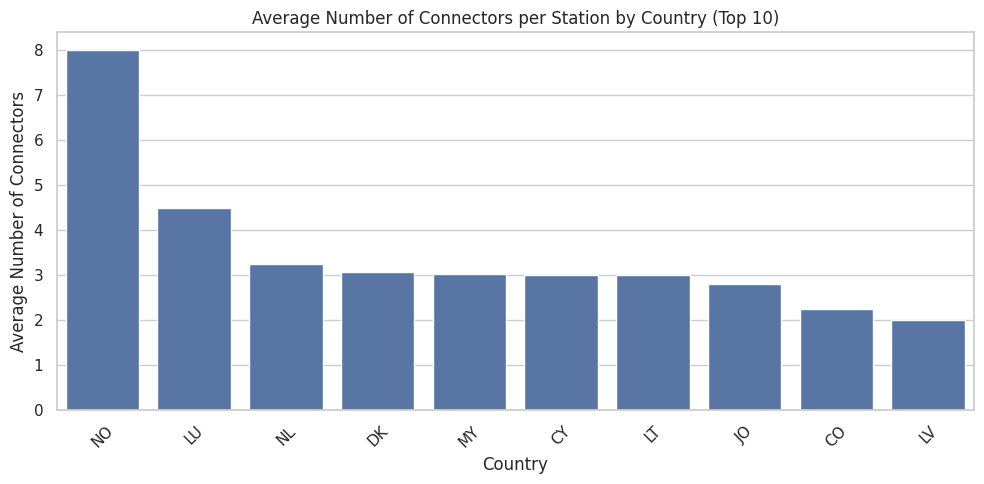

In [ ]:
avg_connectors_country = (
    df_active.groupby("Country")["Num Connectors"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(
    x=avg_connectors_country.index,
    y=avg_connectors_country.values
)
plt.title("Average Number of Connectors per Station by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Average Number of Connectors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Since the dataset only contains installations from the year 2025, there is no multi-year trend visible. Instead, analyzing connector counts by country provides more meaningful insight into infrastructure variation across regions.

## Multivariate Analysis

8. Geographical Distribution of EV Stations

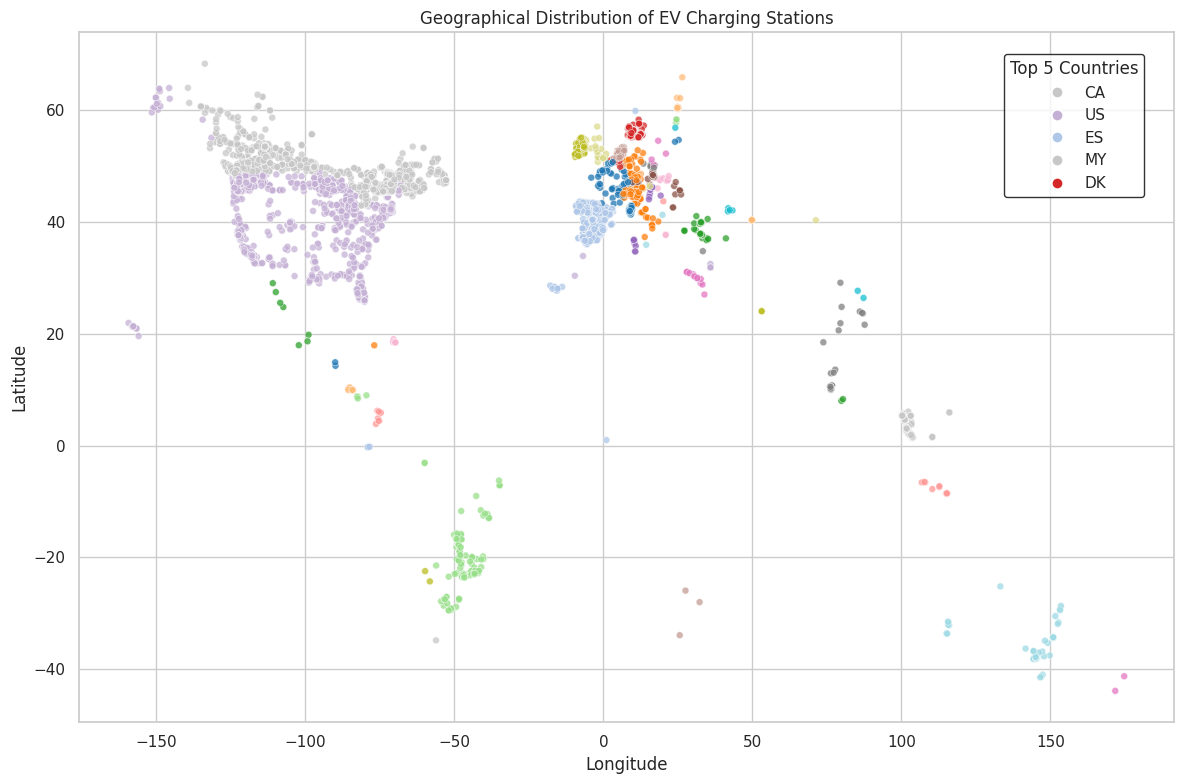

In [ ]:
plt.figure(figsize=(12,8))

# Identify top 5 countries
top5 = df_active["Country"].value_counts().head(5).index.tolist()

# Create a color palette for all countries
unique_countries = df_active["Country"].unique().tolist()
palette_full = sns.color_palette("tab20", len(unique_countries))
palette_map = dict(zip(unique_countries, palette_full))

# Plot all countries with full colors
ax = sns.scatterplot(
    data=df_active.sample(frac=1, random_state=42),
    x="Longitude",
    y="Latitude",
    hue="Country",
    palette=palette_map,
    s=25,
    alpha=0.75,
    legend=False  # disable default legend
)

plt.title("Geographical Distribution of EV Charging Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Manual legend for the top 5
from matplotlib.lines import Line2D

legend_handles = [
    Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=country,
        markerfacecolor=palette_map[country],
        markersize=8
    )
    for country in top5
]

plt.legend(
    handles=legend_handles,
    title="Top 5 Countries",
    loc="upper right",
    bbox_to_anchor=(0.98, 0.98),
    frameon=True,
    facecolor="white",
    edgecolor="black"
)

plt.tight_layout()
plt.show()


The geographic distribution of charging stations shows clear clustering in the Top 5 countries: Canada, the United States, Spain, Denmark, and Malaysia.
These regions exhibit dense and concentrated charging networks, particularly in urban and coastal areas.
Canada and the US dominate the North American region, while Spain and Denmark represent strong infrastructure presence in Europe.
Malaysia stands out in Southeast Asia with a notable cluster despite being outside the typical EV-heavy regions.
All remaining countries contribute scattered, low-density points, reinforcing that global EV infrastructure is still highly uneven and concentrated in a few leading markets.

9. Correlation Heatmap (Numeric Features)

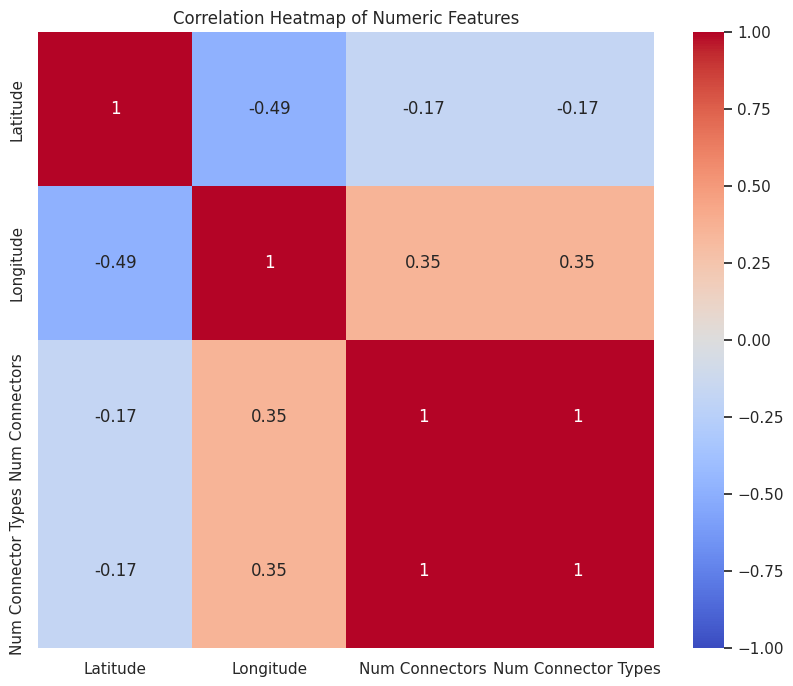

In [ ]:
numeric_cols = ["Latitude", "Longitude", "Num Connectors", "Num Connector Types"]

plt.figure(figsize=(10,8))
sns.heatmap(
    df_active[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


The numeric features in the dataset show weak to moderate correlations.
Latitude and longitude have a moderate negative relationship, reflecting geographic clustering where most stations lie along specific latitudinal bands.
The number of connectors and the number of connector types exhibit a strong positive correlation because stations offering more connector types typically support higher capacity charging setups. Other correlations remain weak, indicating that station location and station capacity are largely independent features in this dataset.

10. Connector Type Mix in Top 5 Countries

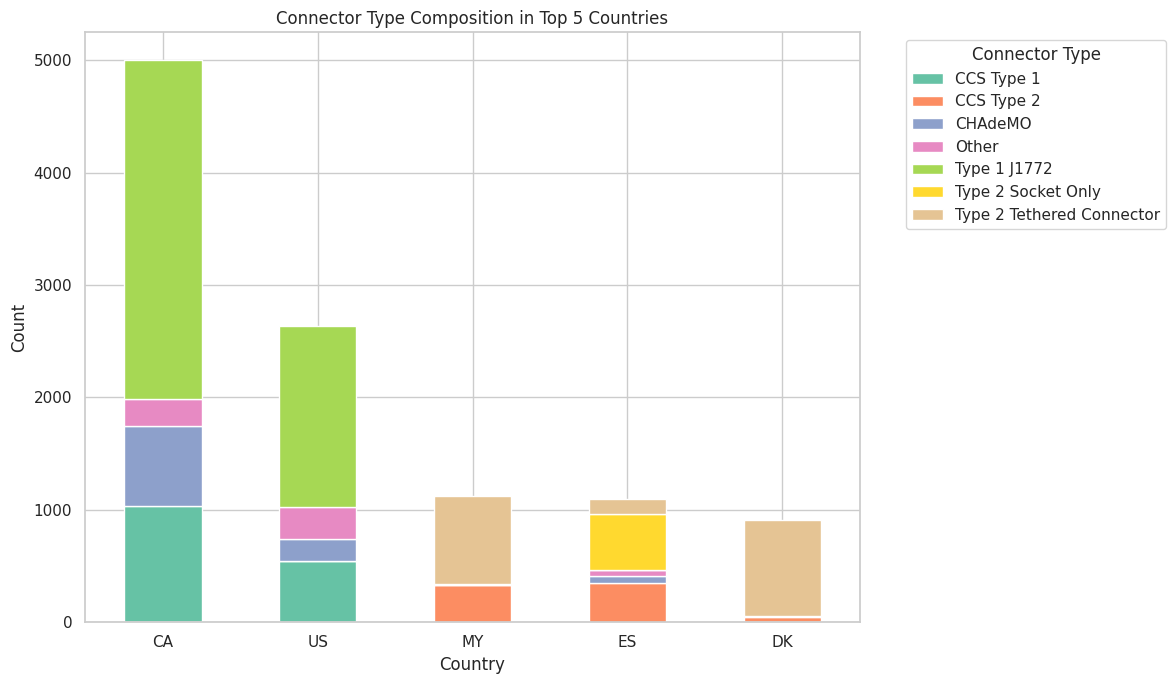

In [ ]:
# Top 5 countries
top5 = df_active["Country"].value_counts().head(5).index.tolist()

# Subset data
subset = df_active[df_active["Country"].isin(top5)][["Country", "Connector Types"]].dropna()

# Explode connector types
subset = subset.assign(conn_type=subset["Connector Types"].str.split("|")).explode("conn_type")
subset["conn_type"] = subset["conn_type"].str.strip()

# Identify top 6 connector types overall
top_connectors = subset["conn_type"].value_counts().head(6).index.tolist()

# Group all other connectors into "Other"
subset["conn_type"] = subset["conn_type"].apply(lambda x: x if x in top_connectors else "Other")

# Build pivot table
pivot = pd.crosstab(subset["Country"], subset["conn_type"])

# Order countries: by total connector count (descending)
country_order = pivot.sum(axis=1).sort_values(ascending=False).index.tolist()

# Reorder pivot
pivot = pivot.loc[country_order]

# Vibrant color palette (7 colors = 6 top connectors + 1 "Other")
colors = sns.color_palette("Set2", len(pivot.columns))

# Plot
pivot.plot(kind="bar", stacked=True, figsize=(12,7), color=colors)

plt.ylabel("Count")
plt.xlabel("Country")
plt.title("Connector Type Composition in Top 5 Countries")

plt.xticks(rotation=0)
plt.legend(title="Connector Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


After grouping less common connector types into an “Other” category, clearer patterns emerge. Canada and Spain show strong reliance on CCS and Type 2 connectors, reflecting widespread adoption of global fast-charging standards.
Denmark stands out with a high proportion of Type 2 Socket Only, aligning with the Scandinavian preference for AC charging. The United States shows a significantly different profile, with NEMA connectors dominating due to compatibility with North American residential and public AC outlets. Malaysia exhibits a mixed connector landscape, suggesting an evolving infrastructure without a single dominant standard. The simplified classification highlights that while connector ecosystems differ regionally, a few core standards drive most of the global EV charging infrastructure.

# **Documentation & Insights**


**Project Summary**

The goal of this project was to understand global EV charging infrastructure by exploring where charging stations are located, what connector types they use, and how their capacity varies across regions. I began by cleaning and preparing the dataset to ensure the information was accurate and consistent for analysis. Through exploratory data analysis, I examined key patterns such as the number of connectors per station, the most common connector types, and monthly installation activity. I also compared different countries to understand how their charging networks differ in scale and capability. Geographic and multivariate analysis further highlighted regional clusters and differences in connector standards. Overall, the results show that EV charging infrastructure is growing worldwide but remains unevenly distributed, with a few countries leading in both station count and connector diversity. This analysis provides a clear, practical overview of how EV charging systems are developing globally and directly supports the project’s aim of understanding regional differences in EV charging availability.

**Key Insights from the Analysis**

1. **Station Capacities Vary Widely Across the World:**  
   Most EV stations have only one connector, indicating that global infrastructure is still dominated by small capacity charging points, although some countries deploy higher capacity stations.

2. **Strong Geographic Clustering:**  
   Charging stations are heavily concentrated in North America, Europe, and parts of Asia, while other regions show very limited infrastructure.

3. **Country-Level Differences in Infrastructure Design:**  
   Denmark and Malaysia tend to operate stations with more connectors per site, while Canada, Spain, and the US rely more on single connector stations.

4. **Connector Types Follow Regional Standards:**  
   Europe mainly uses Type 2 and CCS connectors, the US relies heavily on NEMA and CCS, and Malaysia shows a mixed connector landscape.

5. **Limited Temporal Insights:**  
   Most stations are recorded in 2025, indicating that the dataset reflects a snapshot rather than long term trends. Monthly activity shows uneven installation reporting.

6. **EV Compatibility and Diversity:**  
   While some stations support multiple connector types, the majority offer limited options, which may affect usability for a wider range of EV models.

7. **Location Has Minimal Impact on Capacity:**  
   Correlation analysis shows weak relationships between geographic coordinates and station connector counts, meaning location does not strongly predict station capability.


**Explanation of the EDA Approach**

The visualizations used in this analysis were chosen based on the type of data and the questions we aimed to answer.
1. Histograms were used to understand distributions of numeric features.
2. Bar charts were used for ranking countries and connector types.
3. Boxplots allowed comparison of capacity across regions.
4. A correlation heatmap helped reveal relationships between numeric variables.
5. A multivariate geographic scatter plot revealed spatial patterns and regional clustering.

These choices ensure the results are clear, easy to interpret, and aligned with the project’s main goal of understanding EV infrastructure differences across regions.


**Conclusion**

This project provides a clear overview of global EV charging infrastructure. By exploring station capacity, connector diversity, regional patterns, and geographic clustering, the analysis highlights how different countries approach EV support. Although the infrastructure is expanding, growth is uneven, with a few countries leading in both station count and connector diversity. These findings directly support the project’s aim of understanding regional differences in EV charging availability and offer meaningful insights for future planning and policy decisions.
